## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import re

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Tools for preprocessing input data
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import gensim

## Loading Data

In [2]:
data = pd.read_csv(r'C:\Users\vamsi\Desktop\M.Tech\ML\19 Projects\sentiment_data.tsv', delimiter="\t")
#data = data[:2000]

In [3]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
data.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
data = data.drop(['id'], axis=1)

In [6]:
data.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
data.shape

(25000, 2)

# <font color = "green">**Processing Message** </font>

In [8]:
def processing(review):

    # Remove email addresses with 'emailaddr'    
    raw_review = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', " ", review)
    
    # Remove URLs with 'httpaddr'
    raw_review = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', " ", raw_review) 

    # Remove non-letters        
    raw_review = re.sub("[^a-zA-Z]", " ", raw_review) 
    
    # Remove numbers
    raw_review = re.sub('\d+(\.\d+)?', " ", raw_review)

    # Convert to lower case, split into individual words
    words = raw_review.lower().split()                                             

    # Gather the list of stopwords in English Language
    stops = set(stopwords.words("english"))                  

    # Remove stop words and stemming the remaining words
    meaningful_words = [ps.stem(w) for w in words if not w in stops]   

    # Join the tokens back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [9]:
# Corpus
clean_reviews_corpus = []

# Porter Stemmer
ps = PorterStemmer()

In [10]:
# No. of Reviews
review_count = data['review'].size
review_count

25000

In [11]:
for i in range( 0, review_count):
    clean_reviews_corpus.append(processing(data["review"][i]))    

In [12]:
print ("Original Text : \n")
data["review"][0]

Original Text : 



"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [13]:
print ("Processed Text : \n")

clean_reviews_corpus[:1]

Processed Text : 



['stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one leve

# <font color = "green">**Preparing Vectors for each message** </font>

In [14]:
cv = CountVectorizer()
data_input = cv.fit_transform(clean_reviews_corpus)
data_input = data_input.toarray()

In [15]:
data_input[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
data_input.size

1237075000

# <font color = "green">**Creating WordCloud** </font>

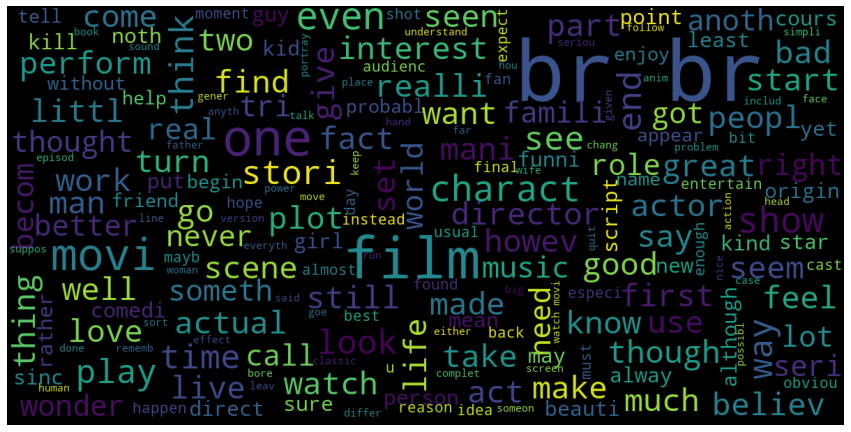

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black', stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(clean_reviews_corpus)

# <font color = "green">**Applying Classification** </font>

- **Input** = Prepared Sparse Matrix / Vectors for each message

- **Output** = Negative or Positive Sentiment

In [18]:
data_output = data['sentiment']
print (data_output.value_counts())

1    12500
0    12500
Name: sentiment, dtype: int64


<AxesSubplot:>

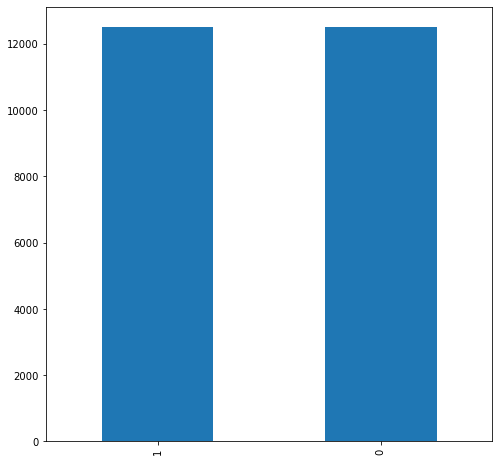

In [19]:
plt.figure(figsize = (8, 8))
data['sentiment'].value_counts().plot.bar()

#### Splitting data for Training and Testing

In [20]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_input, data_output,test_size= 0.20, random_state = 0)

## <font color = "green">Preparing ML Models</font>

### Training

In [ ]:
model_nvb = GaussianNB()
model_nvb.fit(train_x, train_y)

model_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
model_rf.fit(train_x, train_y)

model_dt = tree.DecisionTreeClassifier()
model_dt.fit(train_x, train_y)

### Prediction

In [ ]:
prediction_nvb = model_nvb.predict(test_x)
prediction_rf = model_rf.predict(test_x)
prediction_dt = model_dt.predict(test_x)

### Results Naive Bayes

In [ ]:
print ("Accuracy for Naive Bayes : %0.5f \n\n" % accuracy_score(test_y, prediction_nvb))
print ("Classification Report Naive bayes: \n", classification_report(test_y, prediction_nvb))

### Results Decision Tree

In [ ]:
print ("Accuracy for Decision Tree: %0.5f \n\n" % accuracy_score(test_y, prediction_dt))
print ("Classification Report Decision Tree: \n", classification_report(test_y, prediction_dt))

### Results Random Forest

In [ ]:
print ("Accuracy for Random Forest: %0.5f \n\n" % accuracy_score(test_y, prediction_rf))
print ("Classification Report Random Forest: \n", classification_report(test_y, prediction_rf))